In [1]:
import scipy.io
import os
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as py
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve


In [2]:
train_set = scipy.io.loadmat("Desktop/ML_FUW/Dane_kalibracja_p300/p300_DS1.mat")
test_set1 = scipy.io.loadmat("Desktop/ML_FUW/Dane_kalibracja_p300/p300_DS2.mat")
test_set2 = scipy.io.loadmat("Desktop/ML_FUW/Dane_kalibracja_p300/p300_DS3.mat")

In [3]:
def get_X_Y(data):
    X = data["X"].tolist()
    Y = data["Y"].tolist()[0]
    return X, Y
X, Y =  get_X_Y(train_set)
X1, Y1 = get_X_Y(test_set1)
X2, Y2 = get_X_Y(test_set2)

In [4]:
def plot_precision_and_recall(precision, recall, threshold):
    py.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    py.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    py.xlabel("threshold", fontsize=19)
    py.legend(loc="upper right", fontsize=19)
    py.ylim([0, 1])
    
def plot_precision_vs_recall(precision, recall):
    py.plot(recall, precision, "g--", linewidth=2.5)
    py.ylabel("recall", fontsize=19)
    py.xlabel("precision", fontsize=19)
    py.axis([0, 1.5, 0, 1.5])
    
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    py.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    py.plot([0, 1], [0, 1], 'r', linewidth=4)
    py.axis([0, 1, 0, 1])
    py.xlabel('False Positive Rate (FPR)', fontsize=16)
    py.ylabel('True Positive Rate (TPR)', fontsize=16)


accuracy 0.8285714285714286
precision 0.8571428571428571
recall 0.5454545454545454


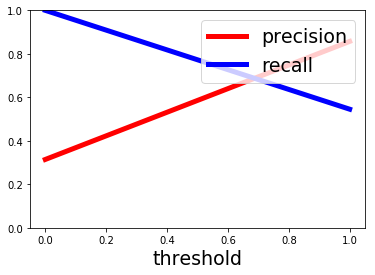

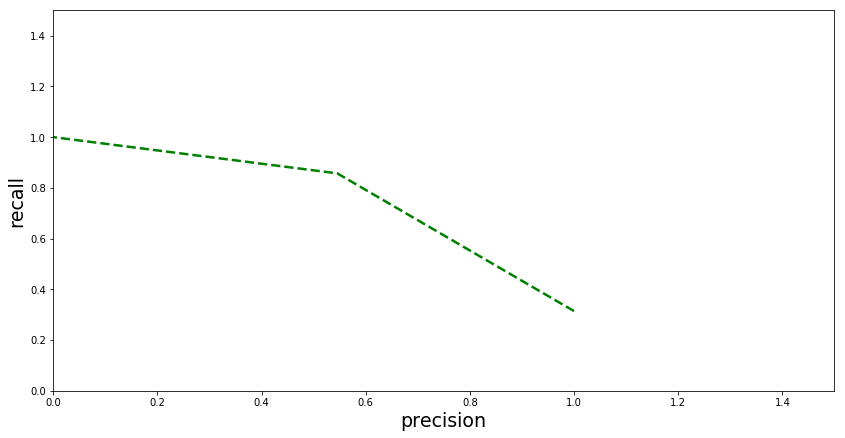

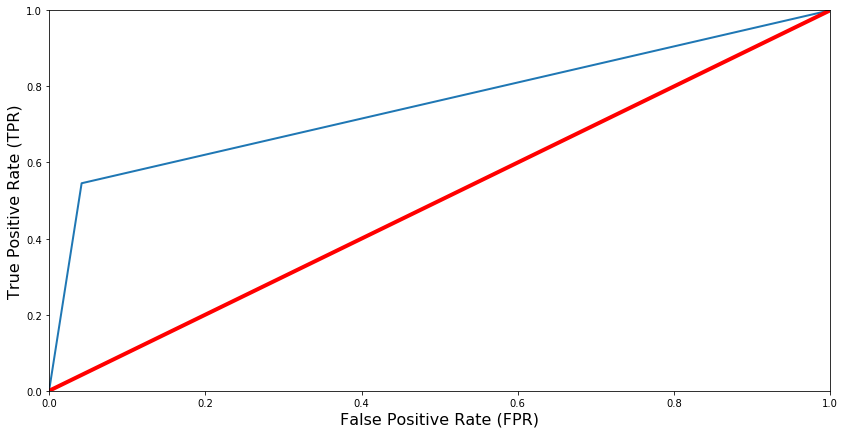

In [5]:
#CL1
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
y_pred = clf.predict(X1)
probs = clf.predict_proba(X1)
probs = probs[:, 1]
print("accuracy", accuracy_score(Y1, y_pred))
print("precision", precision_score(Y1, y_pred))
print("recall", recall_score(Y1, y_pred))
precision, recall, threshold = precision_recall_curve(Y1, y_pred)
false_positive_rate, true_positive_rate, thresholds= roc_curve(Y1, probs, pos_label=1)
plot_precision_and_recall(precision, recall, threshold)
py.show()
py.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
py.show()
py.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
py.show()






In [6]:
#CL2
from sklearn import svm
clf = svm.SVC()
clf = clf.fit(X, Y)
y_pred = clf.predict(X1)

accuracy 0.6857142857142857
precision 0.0
recall 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


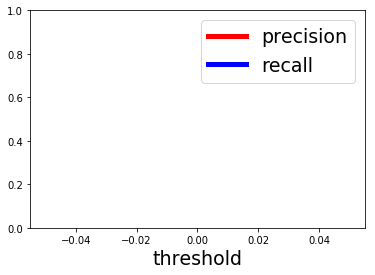

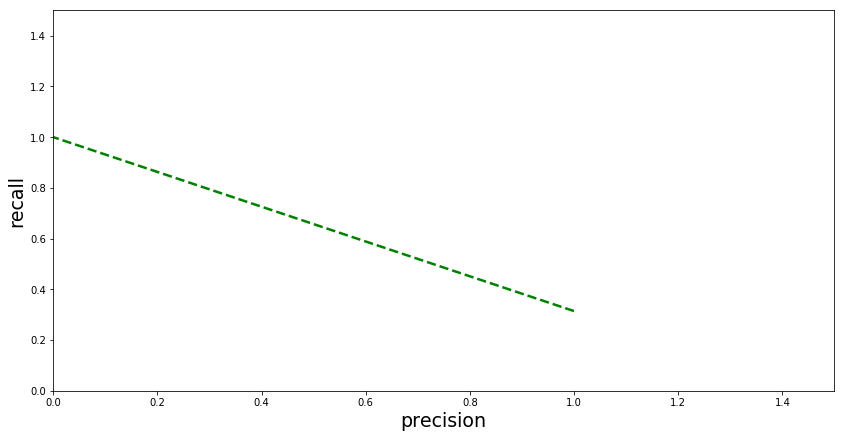

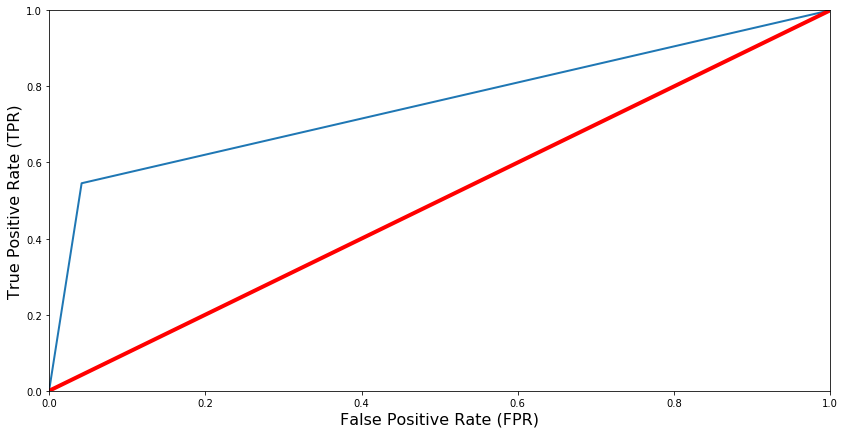

In [7]:

print("accuracy", accuracy_score(Y1, y_pred))
print("precision", precision_score(Y1, y_pred))
print("recall", recall_score(Y1, y_pred))
precision, recall, threshold = precision_recall_curve(Y1, y_pred)
false_positive_rate, true_positive_rate, thresholds= roc_curve(Y1, probs, pos_label=1)
plot_precision_and_recall(precision, recall, threshold)
py.show()
py.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
py.show()
py.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
py.show()

accuracy 0.7714285714285715
precision 0.6666666666666666
recall 0.5454545454545454


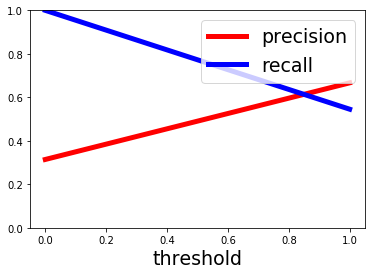

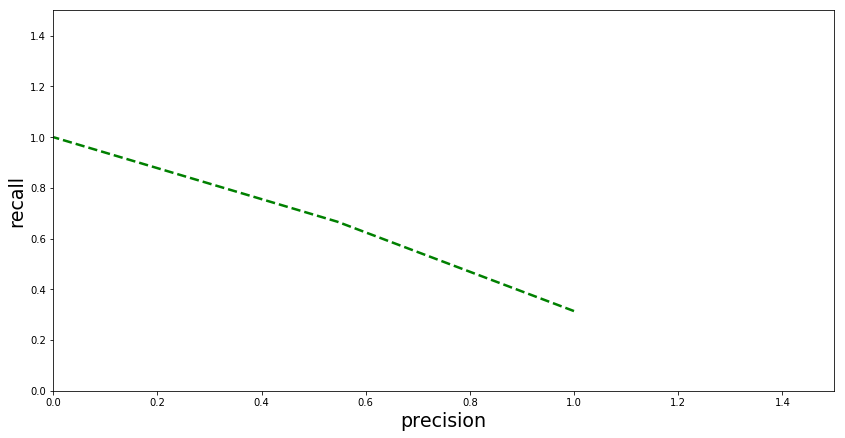

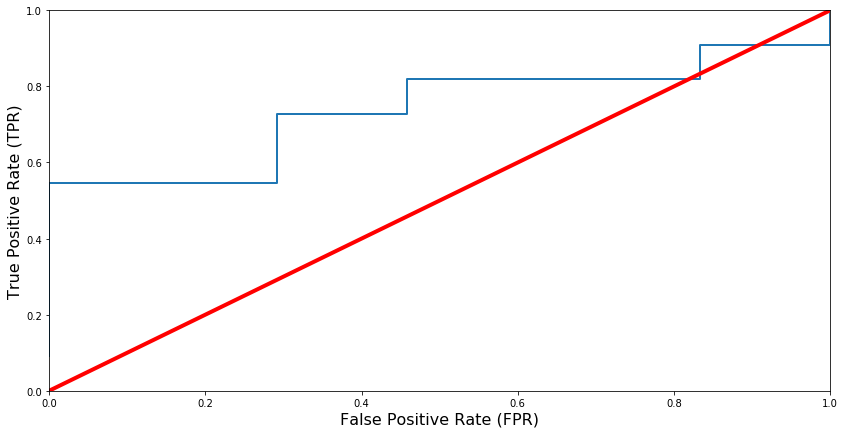

In [8]:
#CL3

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf = clf.fit(X, Y)
y_pred = clf.predict(X1)
probs = clf.predict_proba(X1)
probs = probs[:, 1]
print("accuracy", accuracy_score(Y1, y_pred))
print("precision", precision_score(Y1, y_pred))
print("recall", recall_score(Y1, y_pred))
precision, recall, threshold = precision_recall_curve(Y1, y_pred)
false_positive_rate, true_positive_rate, thresholds= roc_curve(Y1, probs, pos_label=1)
plot_precision_and_recall(precision, recall, threshold)
py.show()
py.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
py.show()
py.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
py.show()



In [10]:
#CL4 Multi-layer Perceptron classifier

from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=0.2,
                    hidden_layer_sizes=(3, 3), random_state=1)

clf.fit(X, Y)                         
y_pred = clf.predict(X1)

accuracy 0.8
precision 1.0
recall 0.36363636363636365


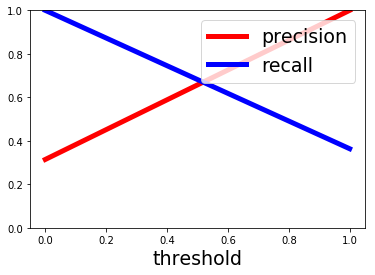

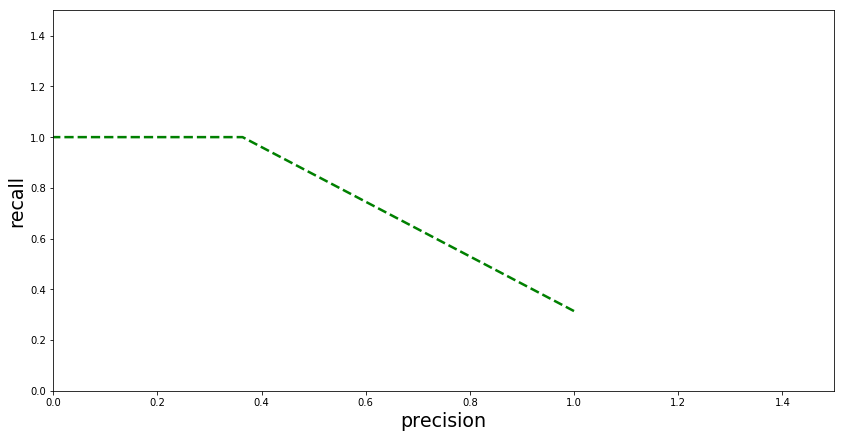

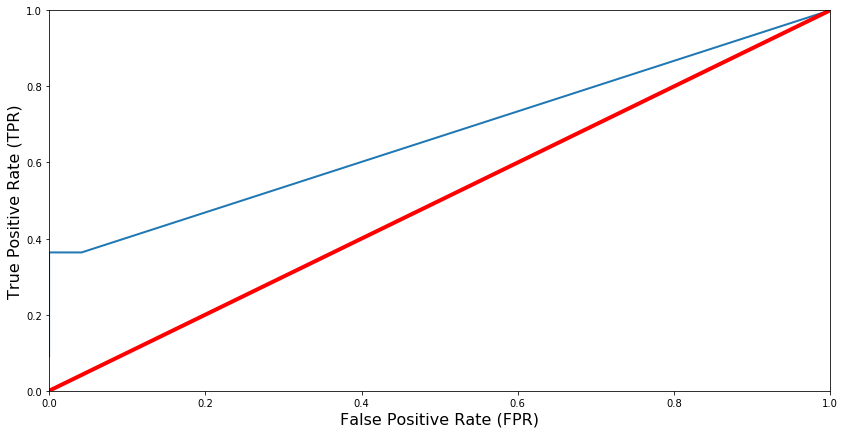

In [11]:
y_pred = clf.predict(X1)
probs = clf.predict_proba(X1)
probs = probs[:, 1]
print("accuracy", accuracy_score(Y1, y_pred))
print("precision", precision_score(Y1, y_pred))
print("recall", recall_score(Y1, y_pred))
precision, recall, threshold = precision_recall_curve(Y1, y_pred)
false_positive_rate, true_positive_rate, thresholds= roc_curve(Y1, probs, pos_label=1)
plot_precision_and_recall(precision, recall, threshold)
py.show()
py.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
py.show()
py.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
py.show()

In [13]:
#CL5 Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="hinge", penalty="l1")
clf.fit(X, Y)
y_pred = clf.predict(X1)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy 0.6571428571428571
precision 0.4666666666666667
recall 0.6363636363636364


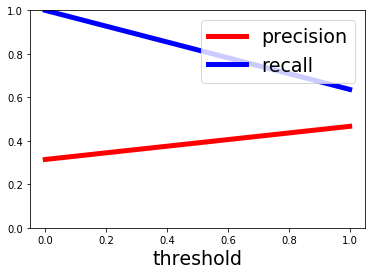

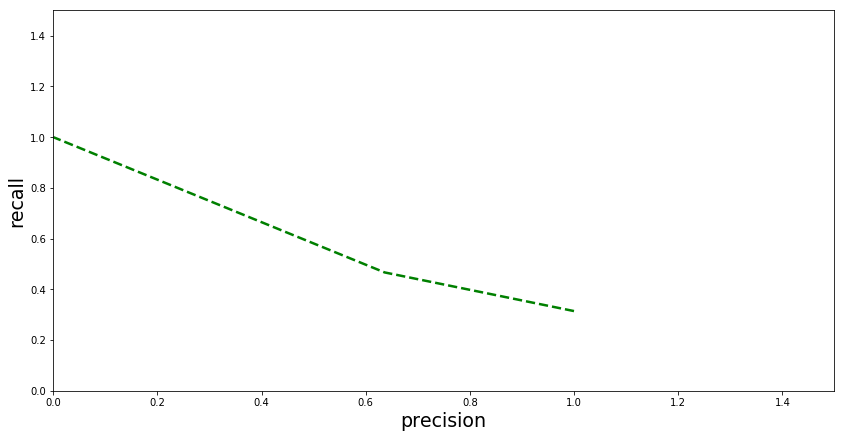

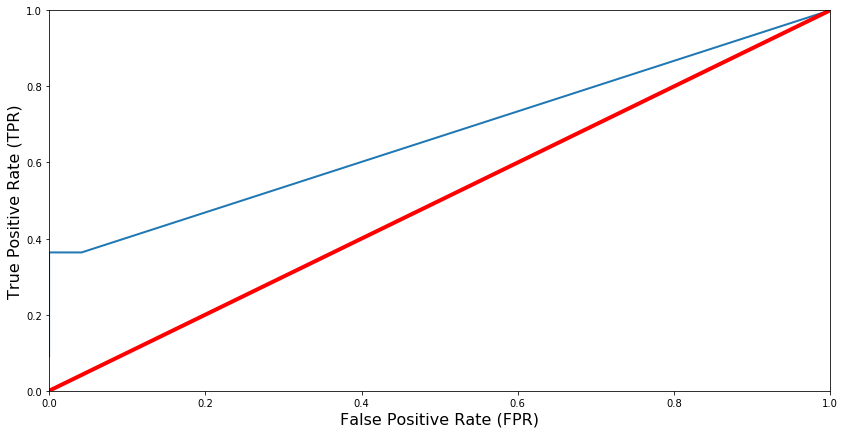

In [15]:
y_pred = clf.predict(X1)

print("accuracy", accuracy_score(Y1, y_pred))
print("precision", precision_score(Y1, y_pred))
print("recall", recall_score(Y1, y_pred))
precision, recall, threshold = precision_recall_curve(Y1, y_pred)
false_positive_rate, true_positive_rate, thresholds= roc_curve(Y1, probs, pos_label=1)
plot_precision_and_recall(precision, recall, threshold)
py.show()
py.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
py.show()
py.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
py.show()

In [16]:
#CL6 Logistic Regression (aka logit, MaxEnt) classifier.
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(tol=1e-10, C=1.5)
clf.fit(X, Y)
y_pred = clf.predict(X1)

accuracy 0.8285714285714286
precision 1.0
recall 0.45454545454545453


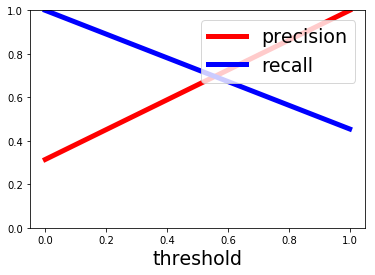

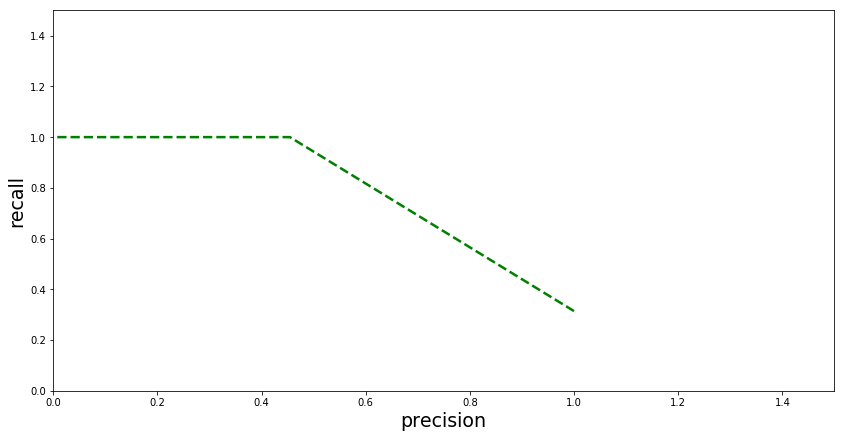

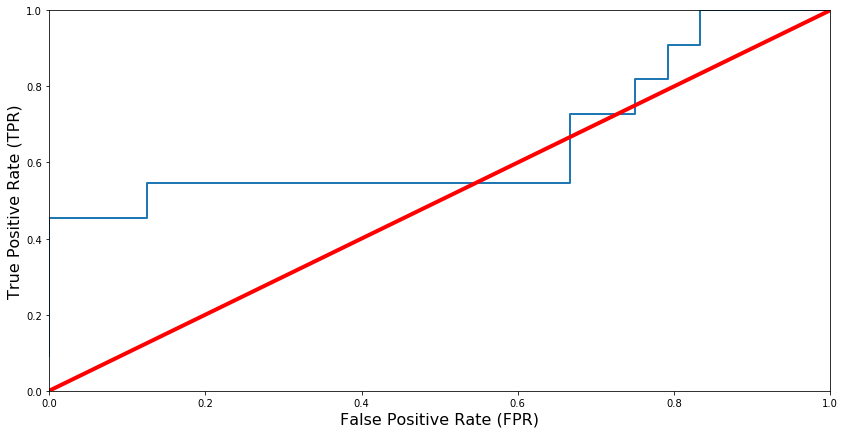

In [17]:
y_pred = clf.predict(X1)
probs = clf.predict_proba(X1)
probs = probs[:, 1]
print("accuracy", accuracy_score(Y1, y_pred))
print("precision", precision_score(Y1, y_pred))
print("recall", recall_score(Y1, y_pred))
precision, recall, threshold = precision_recall_curve(Y1, y_pred)
false_positive_rate, true_positive_rate, thresholds= roc_curve(Y1, probs, pos_label=1)
plot_precision_and_recall(precision, recall, threshold)
py.show()
py.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
py.show()
py.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
py.show()